In [1]:
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_data_with_coordinates.csv')


Populating the interactive namespace from numpy and matplotlib


Plotting Crimes by Date. We see that 05/31 (BLM protests) had the highest crimes, followed by 2019/01/01.

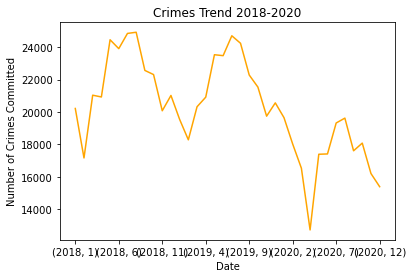

In [2]:
df.index = pd.DatetimeIndex(df.Date)
df.groupby([df.index.year, df.index.month]).size().plot(kind='line',color = ['orange'])
plt.ylabel('Number of Crimes Committed')
plt.xlabel('Date')
plt.title('Crimes Trend 2018-2020')
plt.show()

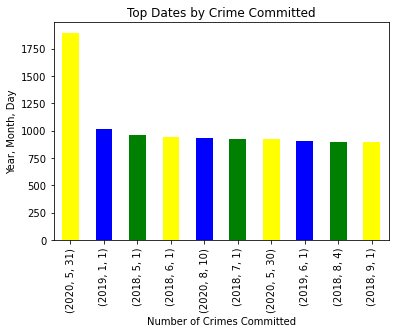

In [3]:
df.index = pd.DatetimeIndex(df.Date)
df.groupby([df.index.year, df.index.month, df.index.day]).size().sort_values(ascending=False)[:10].plot(kind='bar',color=['yellow','blue','green'])
plt.ylabel('Year, Month, Day')
plt.xlabel('Number of Crimes Committed')
plt.title('Top Dates by Crime Committed')
plt.show()

The most crime infested hour is 12am-1am on New Years Day.

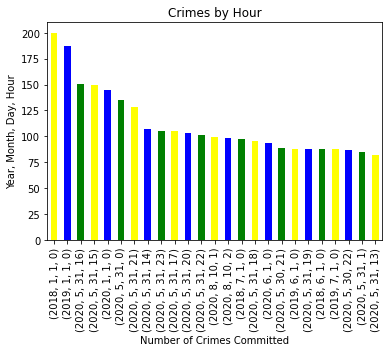

In [4]:
df.index = pd.DatetimeIndex(df.Date)
df.groupby([df.index.year, df.index.month, df.index.day, df.index.hour]).size().sort_values(ascending=False)[:25].plot(kind='bar',color=['yellow','blue','green'])
plt.ylabel('Year, Month, Day, Hour')
plt.xlabel('Number of Crimes Committed')
plt.title('Crimes by Hour')
plt.show()

Correlation Matrix

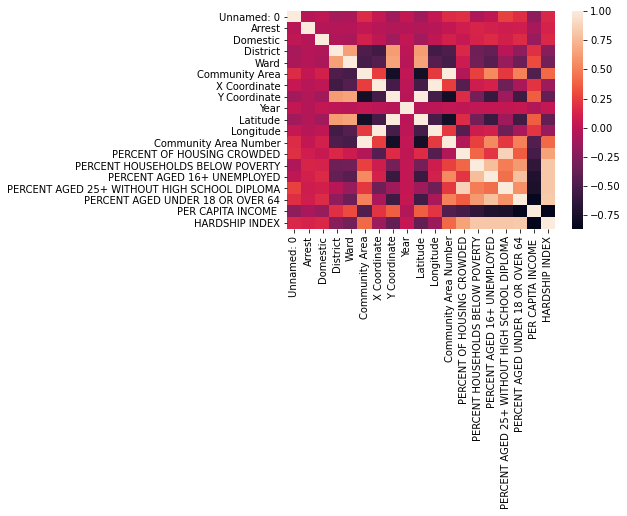

In [5]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

Correlation Plots

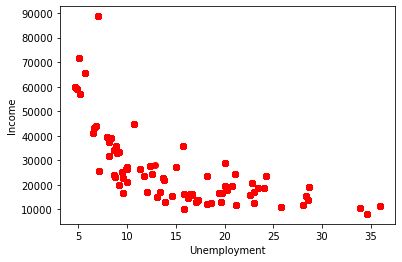

In [6]:
plot( df['PERCENT AGED 16+ UNEMPLOYED'], df['PER CAPITA INCOME '], marker='o', color='red', linestyle='None')

ylabel('Income')
xlabel('Unemployment')
show()

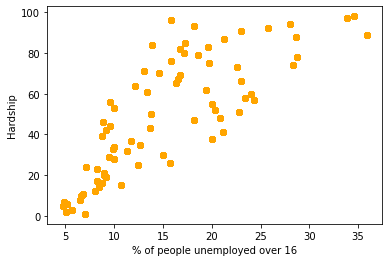

In [7]:
# the more people unemployed, the more hardship

plot( df['PERCENT AGED 16+ UNEMPLOYED'], df['HARDSHIP INDEX'], marker='o', color='orange', linestyle='None')
ylabel('Hardship')
xlabel('% of people unemployed over 16')
show()

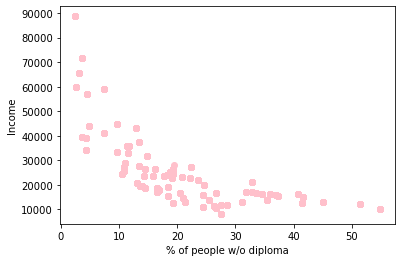

In [8]:
plot( df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'], df['PER CAPITA INCOME '], marker='o', color='pink', linestyle='None')
ylabel('Income')
xlabel('% of people w/o diploma')
show()

**Problem Statement**

When and where in Chicago are you most likely to be a victim of crime?  And what steps can be taken by you and the goverment to be safe? 

Crime by Location *(also add Map and Crimes by Location & Type - Stacked) - Yash / Ari*

<AxesSubplot:xlabel='count', ylabel='Location Description'>

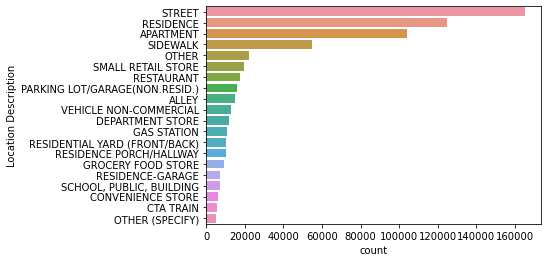

In [9]:
#Crimes by Location (Chose top 19 because 20th entry is Other which provides no additional insights)
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:20].index)

Text(0.5, 1.0, '% of Arrests')

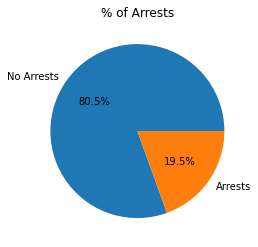

In [10]:
arrests = df['Arrest'].value_counts()
arrests_as_percent = (arrests / df['Arrest'].sum()) * 100 
labels='No Arrests','Arrests'
plt.pie(x=arrests_as_percent,autopct='%1.1f%%',labels=labels)
plt.title("% of Arrests")

In [11]:
df_ny = df[(df.index.day == 1)&(df.index.month == 1)&(df.index.hour == 0)]
df_blm = df[(df.index.day == 31)&(df.index.month == 5)&(df.index.year == 2020)]

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

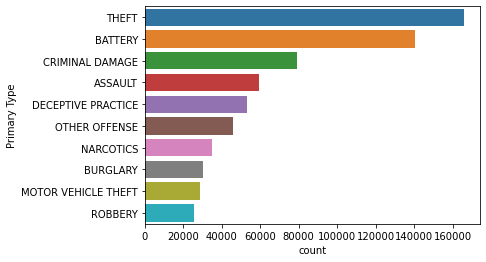

In [12]:
sns.countplot(y= 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:10].index)

Most frequent crime types are THEFT, BATTERY, CRIMINAL DAMAGE

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

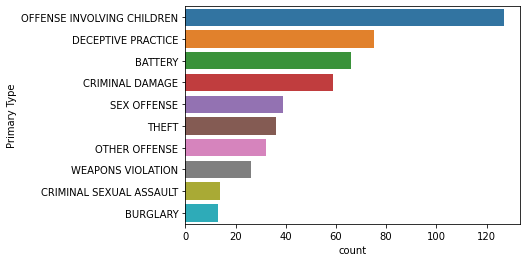

In [13]:
sns.countplot(y= 'Primary Type', data = df_ny, order = df_ny['Primary Type'].value_counts().iloc[:10].index) 

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

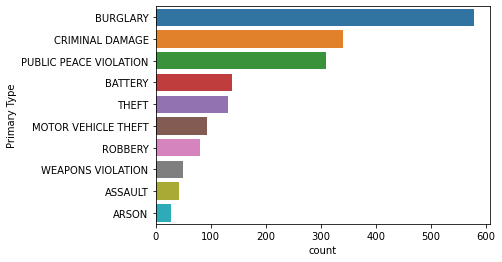

In [14]:
sns.countplot(y= 'Primary Type', data = df_blm, order = df_blm['Primary Type'].value_counts().iloc[:10].index)

General, NY, and BLM, show very different distributions. The high number of offenses involving children is due to underage drinking and sale of tobacco products, etc. 

C:\Users\aritr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aritr\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District')

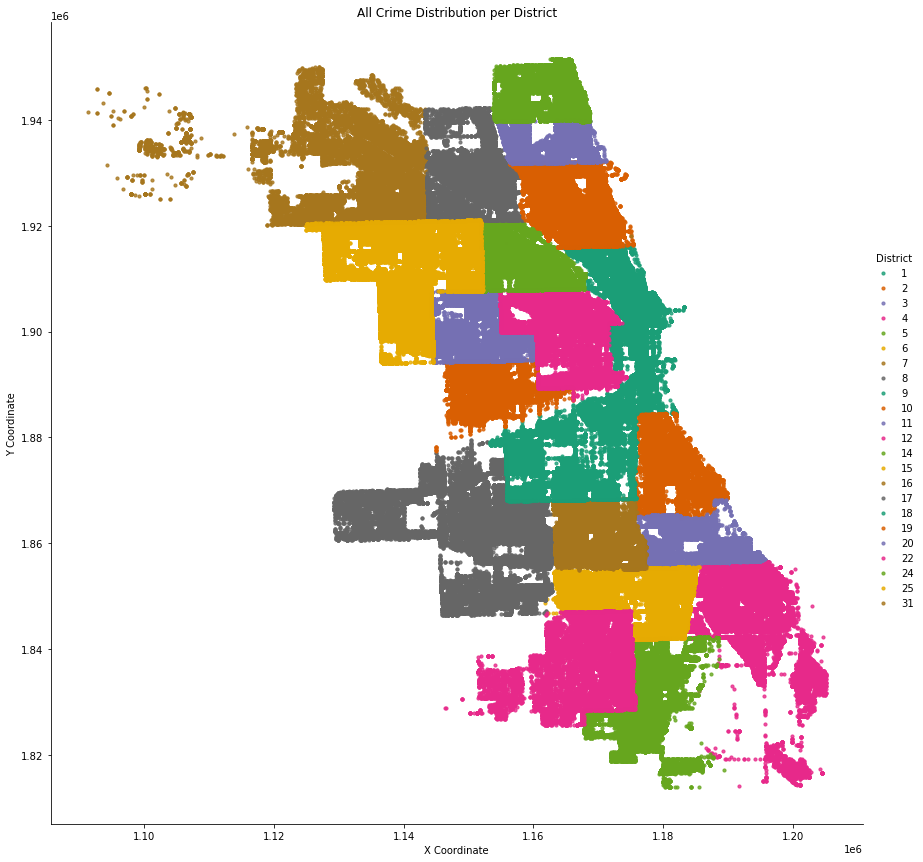

In [15]:
df_map = df.loc[(df['X Coordinate']!=0 & (df['Y Coordinate']!=0))]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df_map[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

C:\Users\aritr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aritr\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All New Years Crime Distribution per District')

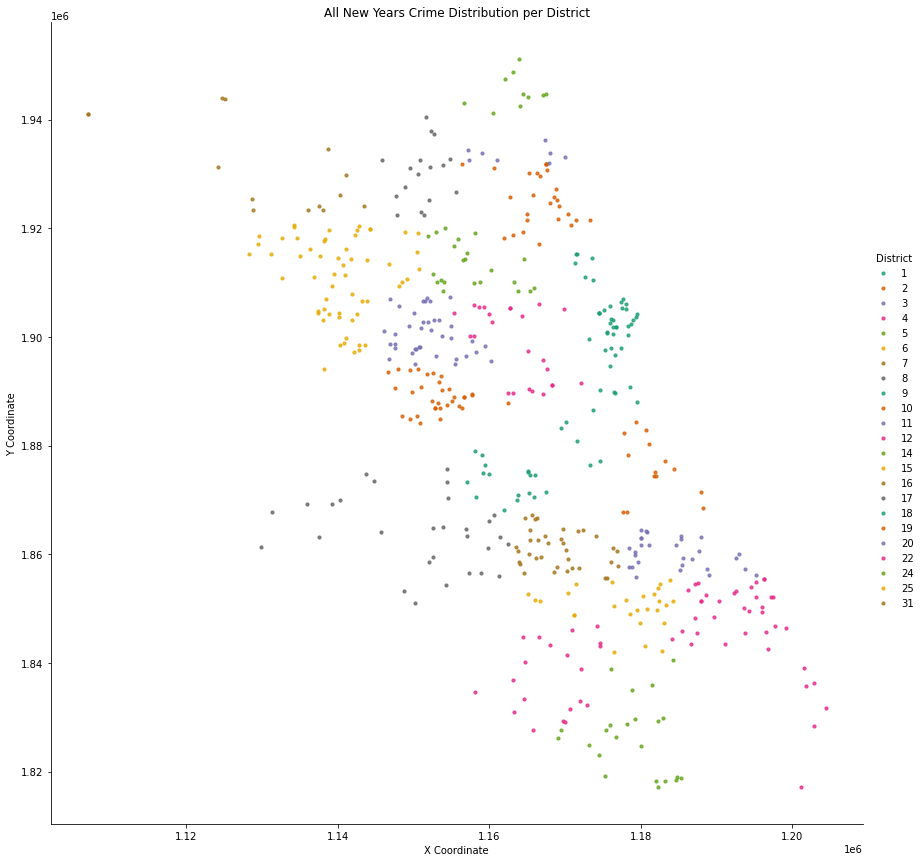

In [16]:
df_ny_map = df_ny.loc[(df_ny['X Coordinate']!=0 & (df_ny['Y Coordinate']!=0))]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df_ny_map[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All New Years Crime Distribution per District")

C:\Users\aritr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aritr\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District on BLM Protest Day')

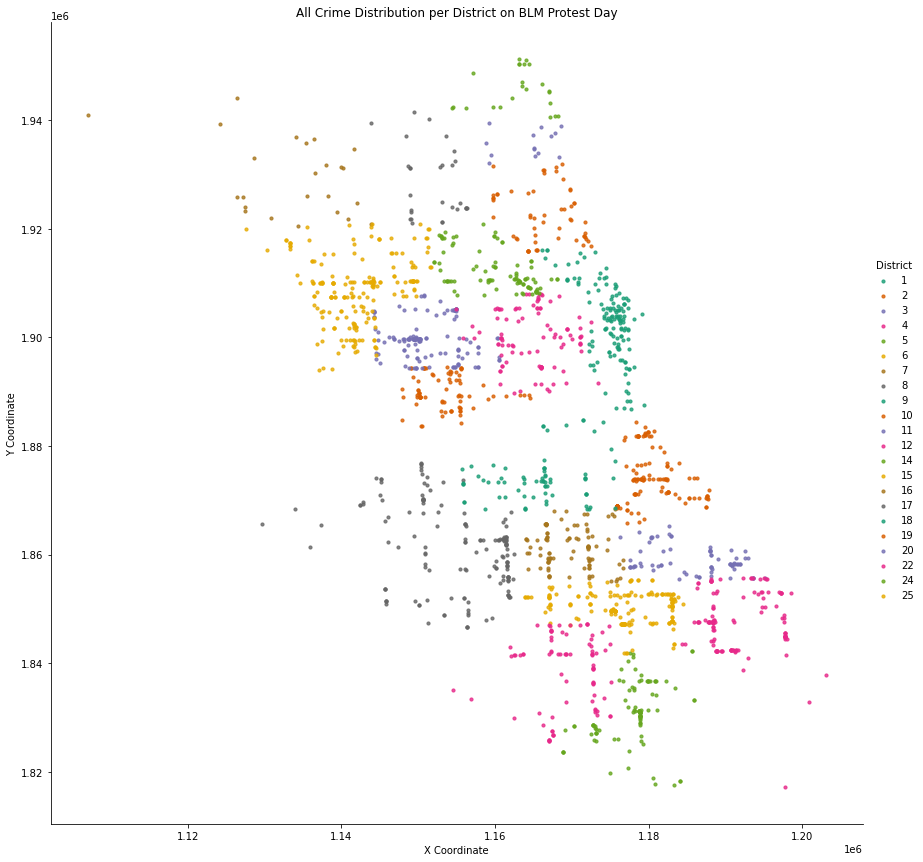

In [17]:
df_blm_map = df_blm.loc[(df_blm['X Coordinate']!=0 & (df_blm['Y Coordinate']!=0))]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df_blm_map[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District on BLM Protest Day")

Crime vs Income *Sorting fix - Serena*

<AxesSubplot:>

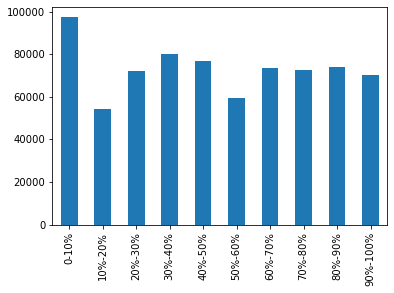

In [18]:
# Crime vs. Income (10% each bin)
df['income_ratio'] = pd.qcut(df['PER CAPITA INCOME '], 10, ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])
df['income_ratio'].value_counts().sort_index().plot(kind='bar')

<ipython-input-19-6a9ca267f54d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny['income_ratio'] = pd.qcut(df_ny['PER CAPITA INCOME '], 10, ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])


<AxesSubplot:>

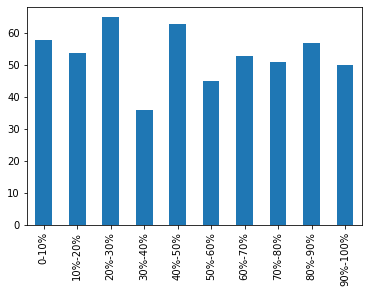

In [19]:
df_ny['income_ratio'] = pd.qcut(df_ny['PER CAPITA INCOME '], 10, ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])
df_ny['income_ratio'].value_counts().sort_index().plot(kind='bar')

<ipython-input-20-2d60d58196e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blm['income_ratio'] = pd.qcut(df_blm['PER CAPITA INCOME '], 10, ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])


<AxesSubplot:>

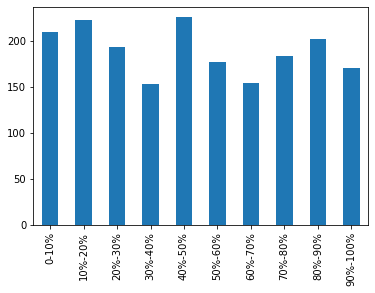

In [20]:
df_blm['income_ratio'] = pd.qcut(df_blm['PER CAPITA INCOME '], 10, ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])
df_blm['income_ratio'].value_counts().sort_index().plot(kind='bar')

In [21]:
df.pivot_table(index='income_ratio', columns='Primary Type', values='Date', aggfunc='count')

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
income_ratio,,,,,,,,,,,,,,,,,,,,,
0-10%,238,8650,22175,2936,134,307,10230,247,2116,3435,...,6233,735,3,809,0,4005,368,78,12128,4810
10%-20%,165,5116,12075,2308,26,150,6400,138,1023,2423,...,3719,27,1,315,1,2298,264,36,8701,2159
20%-30%,151,6363,15504,2710,44,217,8045,156,1517,3547,...,5157,74,1,447,0,2444,291,46,11366,2707
30%-40%,206,7218,17902,3294,32,274,9204,244,1673,4180,...,5559,455,4,495,0,3289,354,47,12980,2934
40%-50%,155,7347,16872,3402,60,258,9760,170,1854,3857,...,5664,135,5,380,0,2713,273,74,13114,3052
50%-60%,95,5217,12386,3191,21,191,7554,162,1453,3830,...,4386,25,1,255,0,1952,261,57,11561,1515
60%-70%,116,5933,13745,3317,146,216,8828,184,1920,6532,...,5263,192,4,391,0,2053,392,74,16824,1158
70%-80%,80,5264,12035,3547,17,281,7950,230,1936,7494,...,4590,7,4,312,0,2061,394,75,20456,795
80%-90%,78,4698,9922,3406,20,269,6963,206,2199,7992,...,3475,19,6,306,0,2488,356,72,26131,570


In [22]:
df_ny.pivot_table(index='income_ratio', columns='Primary Type', values='Date', aggfunc='count')

Primary Type,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,THEFT,WEAPONS VIOLATION
income_ratio,,,,,,,,,,,,,,,,,
0-10%,0,6,3,1,10,2,0,4,0,1,15,2,0,0,7,1,6
10%-20%,1,9,0,0,4,1,0,5,1,0,15,4,0,0,3,4,7
20%-30%,2,4,3,1,9,0,0,6,0,1,22,0,1,0,10,2,4
30%-40%,1,2,0,2,5,2,0,4,1,0,11,1,0,0,2,3,2
40%-50%,0,6,1,1,6,1,2,9,3,1,18,5,0,0,6,1,3
50%-60%,0,4,1,4,8,1,0,3,2,0,8,1,0,2,3,6,2
60%-70%,2,9,0,1,5,2,0,8,2,0,13,4,0,0,2,4,1
70%-80%,0,5,1,0,3,3,0,11,2,0,12,8,1,2,3,0,0
80%-90%,1,6,2,1,6,2,0,17,0,0,10,4,0,0,3,4,1


In [23]:
df_blm.pivot_table(index='income_ratio', columns='Primary Type', values='Date', aggfunc='count')

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,HOMICIDE,INTERFERENCE WITH PUBLIC OFFICER,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,THEFT,WEAPONS VIOLATION
income_ratio,,,,,,,,,,,,,,,,,,,,
0-10%,5,14,16,15,0,43,0,0,1,4,1,10,1,1,4,66,8,1,16,4
10%-20%,5,4,19,26,0,37,0,2,2,4,0,18,0,0,0,80,6,0,12,8
20%-30%,1,5,13,76,0,36,3,1,3,5,0,11,0,1,0,17,11,0,8,3
30%-40%,6,4,18,29,0,24,1,1,0,2,0,8,0,0,1,38,10,0,7,4
40%-50%,3,7,21,86,1,35,0,1,0,3,0,7,1,1,3,18,13,0,17,9
50%-60%,4,1,10,77,0,28,0,3,5,0,0,6,0,0,2,15,8,0,15,3
60%-70%,4,3,10,42,0,27,0,0,1,1,0,12,0,1,1,31,6,0,14,1
70%-80%,0,4,12,69,0,32,0,4,3,0,1,9,3,1,2,20,6,1,13,4
80%-90%,0,1,15,85,0,29,0,5,4,0,0,6,0,1,5,19,11,0,17,4


In [24]:
df_model = df
df_model.rename(columns={'PERCENT OF HOUSING CROWDED':'percent_housing_crowded'}, inplace=True)
df_model.rename(columns={'PERCENT HOUSEHOLDS BELOW POVERTY':'percent_below_poverty'}, inplace=True)
df_model.rename(columns={'PERCENT AGED 16+ UNEMPLOYED':'percent_above_16_unemployed'}, inplace=True)
df_model.rename(columns={'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA':'percent_above_25_no_diploma'}, inplace=True)
df_model.rename(columns={'PERCENT AGED UNDER 18 OR OVER 64':'percent_old_young'}, inplace=True)
df_model.rename(columns={'PER CAPITA INCOME ':'per_capita_income'}, inplace=True)
df_model.rename(columns={'HARDSHIP INDEX':'hardship_index'}, inplace=True)
df_model.rename(columns={'Location Description':'location_description'}, inplace=True)
df_model.rename(columns={'Community Area':'community_area'}, inplace=True)
df_model.rename(columns={'Primary Type':'primary_type'}, inplace=True)

In [25]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import warnings
%pylab inline
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [26]:
df_model.iloc[0]

Unnamed: 0                                                 0
Date                               2020-03-17 21:30:00+00:00
Block                                   039XX N LECLAIRE AVE
primary_type                                           THEFT
Description                                   $500 AND UNDER
location_description                                  STREET
Arrest                                                 False
Domestic                                               False
District                                                  16
Ward                                                      45
community_area                                            15
X Coordinate                                       1141659.0
Y Coordinate                                       1925649.0
Year                                                    2020
Latitude                                           41.952052
Longitude                                          -87.75466
Location                

In [27]:
# df_2 = df_2.sort_values(by = df_model['Date'], ascending = False)
df_model['Month'] = df_model.index.month
df_model['Day'] = df_model.index.day
df_model = df_model[df_model.index.year == 2020].drop(['Unnamed: 0', 'Block', 'Date', 'Description', 'Year', 'Location', 'X Coordinate', 'Y Coordinate', 'Community Area Number', 'COMMUNITY AREA NAME', 'income_ratio'], axis = 1).drop_duplicates()
df_model.dtypes

primary_type                    object
location_description            object
Arrest                            bool
Domestic                          bool
District                         int64
Ward                             int64
community_area                   int64
Latitude                       float64
Longitude                      float64
percent_housing_crowded        float64
percent_below_poverty          float64
percent_above_16_unemployed    float64
percent_above_25_no_diploma    float64
percent_old_young              float64
per_capita_income                int64
hardship_index                 float64
Month                            int64
Day                              int64
dtype: object

In [28]:
df_model['primary_type'] = pd.Categorical(df_model.primary_type)
df_model['location_description'] = pd.Categorical(df_model.location_description)
df_model['Arrest'] = pd.Categorical(df_model.Arrest)
df_model['Domestic'] = pd.Categorical(df_model.Domestic)
df_model['District'] = pd.Categorical(df_model.District)
df_model['Ward'] = pd.Categorical(df_model.Ward)
df_model['community_area'] = pd.Categorical(df_model.community_area)
df_model['percent_housing_crowded'] = pd.Categorical(df_model.percent_housing_crowded)
df_model['percent_below_poverty'] = pd.Categorical(df_model.percent_below_poverty)
df_model['percent_above_16_unemployed'] = pd.Categorical(df_model.percent_above_16_unemployed)
df_model['percent_above_25_no_diploma'] = pd.Categorical(df_model.percent_above_25_no_diploma)
df_model['percent_old_young'] = pd.Categorical(df_model.percent_old_young)
df_model['per_capita_income'] = pd.Categorical(df_model.per_capita_income)
df_model['hardship_index'] = pd.Categorical(df_model.hardship_index)

## Decision Tree Classifier

**ALL CRIMES**

In [29]:
Y, X = dmatrices('primary_type ~ 0 + Month + Day + location_description + District + Ward + Latitude + Longitude + percent_housing_crowded + percent_below_poverty + percent_above_16_unemployed + percent_above_25_no_diploma + percent_old_young + per_capita_income + hardship_index', df_model, return_type = 'dataframe')
y_theft = Y['primary_type[THEFT]'].values
y_battery = Y['primary_type[BATTERY]'].values
y_criminal_damage = Y['primary_type[CRIMINAL DAMAGE]'].values

In [30]:
from sklearn.model_selection import train_test_split
X_train_theft, X_test_theft, y_train_theft, y_test_theft = train_test_split(X, y_theft, test_size=0.3, random_state=1)
X_train_battery, X_test_battery, y_train_battery, y_test_battery = train_test_split(X, y_battery, test_size=0.3, random_state=1)
X_train_criminal_damage, X_test_criminal_damage, y_train_criminal_damage, y_test_criminal_damage = train_test_split(X, y_criminal_damage, test_size=0.3, random_state=1)

In [31]:
from sklearn import tree
from sklearn import metrics
import graphviz
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [32]:
result_theft = model.fit(X_train_theft, y_train_theft)

prediction_theft = model.predict(X_test_theft)
print('Theft Accuracy:', metrics.accuracy_score(y_test_theft, prediction_theft))

graphviz.Source(tree.export_graphviz(model,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True)).render('Theft Tree', format='png')

for importance, name in sorted(zip(result_theft.feature_importances_, X_train_theft.columns),reverse=True)[:5]:
    print (name, importance)

Theft Accuracy: 0.8092991586012354
Latitude 0.41151131755299675
Longitude 0.2750432428772631
location_description[SMALL RETAIL STORE] 0.11084741405738441
location_description[GROCERY FOOD STORE] 0.11053521395693668
location_description[DEPARTMENT STORE] 0.08854086454070514


In [33]:
result_battery = model.fit(X_train_battery, y_train_battery)

prediction_battery = model.predict(X_test_battery)
print('Battery Accuracy:', metrics.accuracy_score(y_test_battery, prediction_battery))

graphviz.Source(tree.export_graphviz(model,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True)).render('Battery Tree', format='png')

for importance, name in sorted(zip(result_battery.feature_importances_, X_train_battery.columns),reverse=True)[:10]:
    print (name, importance)

Battery Accuracy: 0.8007554755767391
location_description[APARTMENT] 0.44139195491322336
location_description[SIDEWALK] 0.2591213266859229
location_description[RESIDENCE] 0.21737439404121953
Latitude 0.03881385375784796
Longitude 0.023337899765936955
District[T.11] 0.01996057083584931
percent_old_young[T.51.5] 0.0
percent_old_young[T.44.9] 0.0
percent_old_young[T.44.0] 0.0
percent_old_young[T.43.6] 0.0


In [34]:
result_criminal_damage = model.fit(X_train_criminal_damage, y_train_criminal_damage)

prediction_criminal_damage = model.predict(X_test_criminal_damage)
print('Criminal Damage Accuracy:', metrics.accuracy_score(y_test_criminal_damage, prediction_criminal_damage))

graphviz.Source(tree.export_graphviz(model,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True)).render('Criminal Damage Tree', format='png')

for importance, name in sorted(zip(result_criminal_damage.feature_importances_, X_train_criminal_damage.columns),reverse=True)[:10]:
    print (name, importance)

Criminal Damage Accuracy: 0.8798858680673768
location_description[SIDEWALK] 0.5632456756830786
location_description[STREET] 0.28806553593296585
Latitude 0.12491669290257792
Month 0.014175709827392198
District[T.11] 0.005186083553266673
Day 0.00441030210071884
percent_old_young[T.51.5] 0.0
percent_old_young[T.44.9] 0.0
percent_old_young[T.44.0] 0.0
percent_old_young[T.43.6] 0.0


## Logistic Regression

**CRIMES ON ALL DAYS**

The top 3 crimes were Theft, Battery and Criminal Damage. 

In [35]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()

In [36]:
result_logistic_theft = model_logistic.fit(X_train_theft, y_train_theft)

prediction_logistic_theft = model_logistic.predict(X_test_theft)
print('Theft Accuracy:', metrics.accuracy_score(y_test_theft, prediction_logistic_theft))

weights_logistic_theft = Series(model_logistic.coef_[0],
                 index=X.columns.values)

print('\nFeatures with the most negative weights for Theft: \n')
for i in weights_logistic_theft.sort_values()[:5].index:
    print(i)

print('\nFeatures with the most positive weights for Theft: \n')
for i in weights_logistic_theft.sort_values()[-5:].index:
    print(i)

Theft Accuracy: 0.8152327221438646

Features with the most negative weights for Theft: 

location_description[SIDEWALK]
location_description[RESIDENCE]
location_description[ALLEY]
location_description[APARTMENT]
location_description[OTHER (SPECIFY)]

Features with the most positive weights for Theft: 

location_description[DRUG STORE]
location_description[RESIDENCE - PORCH / HALLWAY]
location_description[SMALL RETAIL STORE]
location_description[GROCERY FOOD STORE]
location_description[DEPARTMENT STORE]


In [37]:
result_logistic_battery = model_logistic.fit(X_train_battery, y_train_battery)

prediction_logistic_battery = model_logistic.predict(X_test_battery)
print('Battery Accuracy:', metrics.accuracy_score(y_test_battery, prediction_logistic_battery))

weights_logistic_battery = Series(model_logistic.coef_[0],
                 index=X.columns.values)

print('\nFeatures with the most negative weights for Battery: \n')
for i in weights_logistic_battery.sort_values()[:5].index:
    print(i)

print('\nFeatures with the most positive weights for Battery: \n')
for i in weights_logistic_battery.sort_values()[-5:].index:
    print(i)

Battery Accuracy: 0.8007554755767391

Features with the most negative weights for Battery: 

location_description[SMALL RETAIL STORE]
location_description[RESIDENCE - GARAGE]
location_description[DEPARTMENT STORE]
location_description[COMMERCIAL / BUSINESS OFFICE]
location_description[OTHER (SPECIFY)]

Features with the most positive weights for Battery: 

location_description[CHA APARTMENT]
location_description[SCHOOL, PUBLIC, BUILDING]
location_description[RESIDENCE]
location_description[APARTMENT]
location_description[SIDEWALK]


In [38]:
result_logistic_criminal_damage = model_logistic.fit(X_train_criminal_damage, y_train_criminal_damage)

prediction_logistic_criminal_damage = model_logistic.predict(X_test_criminal_damage)
print('Criminal Damage Accuracy:', metrics.accuracy_score(y_test_criminal_damage, prediction_logistic_criminal_damage))

weights_logistic_criminal_damage = Series(model_logistic.coef_[0],
                 index=X.columns.values)

print('\nFeatures with the most negative weights for Criminal Damage: \n')
for i in weights_logistic_criminal_damage.sort_values()[:5].index:
    print(i)

print('\nFeatures with the most positive weights for Criminal Damage: \n')
for i in weights_logistic_criminal_damage.sort_values()[-5:].index:
    print(i)

Criminal Damage Accuracy: 0.8798858680673768

Features with the most negative weights for Criminal Damage: 

location_description[SIDEWALK]
location_description[GROCERY FOOD STORE]
location_description[DEPARTMENT STORE]
location_description[RESIDENCE - PORCH / HALLWAY]
location_description[SMALL RETAIL STORE]

Features with the most positive weights for Criminal Damage: 

location_description[RESIDENCE - YARD (FRONT / BACK)]
location_description[DRIVEWAY - RESIDENTIAL]
location_description[STREET]
location_description[PARKING LOT / GARAGE (NON RESIDENTIAL)]
location_description[RESIDENCE - GARAGE]


**CRIMES ON NEW YEARS DAY**

The top 3 crimes were Offense Involving Children, Deceptive Practice and Battery.

In [39]:
df_model_ny = df_model[(df_model.index.day == 1)&(df_model.index.month == 1)&(df_model.index.hour == 0)]
df_model_blm = df_model[(df_model.index.day == 31)&(df_model.index.month == 5)&(df_model.index.year == 2020)]

In [40]:
Y, X = dmatrices('primary_type ~ 0 + Month + Day + location_description + District + Ward + Latitude + Longitude + percent_housing_crowded + percent_below_poverty + percent_above_16_unemployed + percent_above_25_no_diploma + percent_old_young + per_capita_income + hardship_index', df_model_ny, return_type = 'dataframe')
y_ny_children = Y['primary_type[OFFENSE INVOLVING CHILDREN]'].values
y_ny_deceptive = Y['primary_type[DECEPTIVE PRACTICE]'].values
y_ny_battery = Y['primary_type[BATTERY]'].values

X_train_ny_children, X_test_ny_children, y_train_ny_children, y_test_ny_children = train_test_split(X, y_ny_children, test_size=0.3, random_state=1)
X_train_ny_deceptive, X_test_ny_deceptive, y_train_ny_deceptive, y_test_ny_deceptive = train_test_split(X, y_ny_deceptive, test_size=0.3, random_state=1)
X_train_ny_battery, X_test_ny_battery, y_train_ny_battery, y_test_ny_battery = train_test_split(X, y_ny_battery, test_size=0.3, random_state=1)

In [41]:
result_logistic_ny_deceptive = model_logistic.fit(X_train_ny_children, y_train_ny_children)

prediction_logistic_ny_children = model_logistic.predict(X_test_ny_children)
print('Offense Involving Children Accuracy:', metrics.accuracy_score(y_test_ny_children, prediction_logistic_ny_children))

weights_logistic_ny_children = Series(model_logistic.coef_[0],
                 index=X.columns.values)

print('\nFeatures with the most negative weights for Offense Involving Children: \n')
for i in weights_logistic_ny_children.sort_values()[:5].index:
    print(i)

print('\nFeatures with the most positive weights for Offense Involving Children: \n')
for i in weights_logistic_ny_children.sort_values()[-5:].index:
    print(i)

Offense Involving Children Accuracy: 0.8837209302325582

Features with the most negative weights for Offense Involving Children: 

location_description[STREET]
Ward[T.12]
Ward[T.2]
location_description[SIDEWALK]
Ward[T.11]

Features with the most positive weights for Offense Involving Children: 

Ward[T.37]
Ward[T.20]
location_description[APARTMENT]
District[T.11]
location_description[RESIDENCE]


In [42]:
result_logistic_ny_deceptive = model_logistic.fit(X_train_ny_deceptive, y_train_ny_deceptive)

prediction_logistic_ny_deceptive = model_logistic.predict(X_test_ny_deceptive)
print('Deceptive Practice Accuracy:', metrics.accuracy_score(y_test_ny_deceptive, prediction_logistic_ny_deceptive))

weights_logistic_ny_deceptive = Series(model_logistic.coef_[0],
                 index=X.columns.values)

print('\nFeatures with the most negative weights for Deceptive Practice: \n')
for i in weights_logistic_ny_deceptive.sort_values()[:5].index:
    print(i)

print('\nFeatures with the most positive weights for Deceptive Practice: \n')
for i in weights_logistic_ny_deceptive.sort_values()[-5:].index:
    print(i)

Deceptive Practice Accuracy: 0.813953488372093

Features with the most negative weights for Deceptive Practice: 

Ward[T.2]
location_description[STREET]
District[T.10]
Ward[T.20]
District[T.3]

Features with the most positive weights for Deceptive Practice: 

Ward[T.11]
District[T.14]
Ward[T.34]
location_description[MOVIE HOUSE / THEATER]
Ward[T.7]


In [43]:
result_logistic_ny_battery = model_logistic.fit(X_train_ny_battery, y_train_ny_battery)

prediction_logistic_ny_battery = model_logistic.predict(X_test_ny_battery)
print('Battery Accuracy:', metrics.accuracy_score(y_test_ny_battery, prediction_logistic_ny_battery))

weights_logistic_ny_battery = Series(model_logistic.coef_[0],
                 index=X.columns.values)

print('\nFeatures with the most negative weights for Battery: \n')
for i in weights_logistic_ny_battery.sort_values()[:5].index:
    print(i)

print('\nFeatures with the most positive weights for Battery: \n')
for i in weights_logistic_ny_battery.sort_values()[-5:].index:
    print(i)

Battery Accuracy: 0.7441860465116279

Features with the most negative weights for Battery: 

location_description[RESIDENCE]
location_description[OTHER (SPECIFY)]
Ward[T.6]
Ward[T.27]
Ward[T.21]

Features with the most positive weights for Battery: 

Ward[T.38]
District[T.9]
Ward[T.12]
Ward[T.28]
location_description[HOTEL/MOTEL]


**CRIMES DURING BLM PROTESTS**

The top 3 crimes were Offense Involving Burglary, Criminal Damage and Public Peace Violation. 

In [44]:
Y, X = dmatrices('primary_type ~ 0 + Month + Day + location_description + District + Ward + Latitude + Longitude + percent_housing_crowded + percent_below_poverty + percent_above_16_unemployed + percent_above_25_no_diploma + percent_old_young + per_capita_income + hardship_index', df_model_blm, return_type = 'dataframe')
y_blm_burglary = Y['primary_type[BURGLARY]'].values
y_blm_criminal_damage = Y['primary_type[CRIMINAL DAMAGE]'].values
y_blm_peace = Y['primary_type[PUBLIC PEACE VIOLATION]'].values

X_train_blm_burglary, X_test_blm_burglary, y_train_blm_burglary, y_test_blm_burglary = train_test_split(X, y_blm_burglary, test_size=0.3, random_state=1)
X_train_blm_criminal_damage, X_test_blm_criminal_damage, y_train_blm_criminal_damage, y_test_blm_criminal_damage = train_test_split(X, y_blm_criminal_damage, test_size=0.3, random_state=1)
X_train_blm_peace, X_test_blm_peace, y_train_blm_peace, y_test_blm_peace = train_test_split(X, y_blm_peace, test_size=0.3, random_state=1)

In [45]:
result_logistic_blm_burglary = model_logistic.fit(X_train_blm_burglary, y_train_blm_burglary)

prediction_logistic_blm_burglary = model_logistic.predict(X_test_blm_burglary)
print('Burglary Accuracy:', metrics.accuracy_score(y_test_blm_burglary, prediction_logistic_blm_burglary))

weights_logistic_blm_burglary = Series(model_logistic.coef_[0],
                 index=X.columns.values)

print('\nFeatures with the most negative weights for Burglary: \n')
for i in weights_logistic_blm_burglary.sort_values()[:5].index:
    print(i)

print('\nFeatures with the most positive weights for Burglary: \n')
for i in weights_logistic_blm_burglary.sort_values()[-5:].index:
    print(i)

Burglary Accuracy: 0.7741935483870968

Features with the most negative weights for Burglary: 

location_description[STREET]
location_description[SIDEWALK]
location_description[PARKING LOT / GARAGE (NON RESIDENTIAL)]
location_description[RESIDENCE]
District[T.2]

Features with the most positive weights for Burglary: 

location_description[OTHER (SPECIFY)]
location_description[GROCERY FOOD STORE]
District[T.25]
location_description[TAVERN / LIQUOR STORE]
location_description[DEPARTMENT STORE]


In [46]:
result_logistic_blm_criminal_damage = model_logistic.fit(X_train_blm_criminal_damage, y_train_blm_criminal_damage)

prediction_logistic_blm_criminal_damage = model_logistic.predict(X_test_blm_criminal_damage)
print('Criminal Damage Accuracy:', metrics.accuracy_score(y_test_blm_criminal_damage, prediction_logistic_blm_criminal_damage))

weights_logistic_blm_criminal_damage = Series(model_logistic.coef_[0],
                 index=X.columns.values)

print('\nFeatures with the most negative weights for Criminal Damage: \n')
for i in weights_logistic_blm_criminal_damage.sort_values()[:5].index:
    print(i)

print('\nFeatures with the most positive weights for Criminal Damage: \n')
for i in weights_logistic_blm_criminal_damage.sort_values()[-5:].index:
    print(i)

Criminal Damage Accuracy: 0.8405017921146953

Features with the most negative weights for Criminal Damage: 

location_description[GROCERY FOOD STORE]
location_description[SIDEWALK]
Ward[T.2]
location_description[TAVERN / LIQUOR STORE]
Ward[T.18]

Features with the most positive weights for Criminal Damage: 

Ward[T.21]
Ward[T.44]
location_description[VEHICLE NON-COMMERCIAL]
location_description[BAR OR TAVERN]
location_description[BANK]


In [47]:
result_logistic_blm_peace = model_logistic.fit(X_train_blm_peace, y_train_blm_peace)

prediction_logistic_blm_peace = model_logistic.predict(X_test_blm_peace)
print('Public Peace Violation Accuracy:', metrics.accuracy_score(y_test_blm_peace, prediction_logistic_blm_peace))

weights_logistic_blm_peace = Series(model_logistic.coef_[0],
                 index=X.columns.values)

print('\nFeatures with the most negative weights for Public Peace Violation: \n')
for i in weights_logistic_blm_peace.sort_values()[:5].index:
    print(i)

print('\nFeatures with the most positive weights for Public Peace Violation: \n')
for i in weights_logistic_blm_peace.sort_values()[-5:].index:
    print(i)

Public Peace Violation Accuracy: 0.8673835125448028

Features with the most negative weights for Public Peace Violation: 

District[T.25]
location_description[RESIDENCE]
location_description[APARTMENT]
location_description[STREET]
location_description[ALLEY]

Features with the most positive weights for Public Peace Violation: 

location_description[SMALL RETAIL STORE]
location_description[RESTAURANT]
location_description[CONVENIENCE STORE]
District[T.11]
location_description[GROCERY FOOD STORE]
